In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [100]:
# Function to initialize u(x, 0) as a Gaussian, now centered around 0
def generate_initial_u(x):
    """
    Generate the initial state u(0, x) as a superposition of two Gaussian functions.
    """
    # Sampling parameters for the Gaussian functions
    a1 = np.random.uniform(0, 2)
    a2 = np.random.uniform(-2, 0)
    mu1 = np.random.uniform(-1, 1)
    mu2 = np.random.uniform(-0.5, 0.5)
    sigma1 = np.random.uniform(0.2, 0.6)
    sigma2 = np.random.uniform(0.3, 0.8)
    
    u = a1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2)) + a2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))
    u[0] = 0
    u[-1] = 0
    return u

def generate_control_sequence(x, t):
    """
    Generate control sequence w(t, x) as a superposition of 8 Gaussian functions.
    """
    w = np.zeros_like(x)
    for i in range(8):
        ind = np.random.binomial(1, 0.5)
        if i==0:
            ai = np.random.uniform(-1.5,1.5)
        else:
            if ind:
                ai = np.random.uniform(-1.5,1.5)
            else:
                ai = 0
        b1_i = np.random.uniform(0, 1)
        b2_i = np.random.uniform(0, 1)
        sigma1_i = np.random.uniform(0.05, 0.2)
        sigma2_i = np.random.uniform(0.05, 0.2)
        
        w += ai * np.exp(-((x - b1_i)**2) / (2 * sigma1_i**2)) * np.exp(-((t - b2_i)**2) / (2 * sigma2_i**2))
    
    return w


# Discretized Burgers equation solver using Lax-Friedrichs method with viscosity
def lax_friedrichs_with_viscosity(y, u, dx, dt, nu=0.01):
    y_new = np.copy(y)
    for i in range(1, len(y) - 1): # Loop over the interior points and apply the Lax-Friedrichs scheme with viscosity
        convective_term = (y[i + 1] - y[i - 1]) / (2 * dx) # Convective term (advection)
        diffusive_term = (y[i + 1] - 2 * y[i] + y[i - 1]) / (dx**2) # Diffusive term (viscosity)
        y_new[i] = 0.5 * (y[i+1] + y[i-1]) - (dt/(2*dx))*y[i]*convective_term + nu*dt*diffusive_term + 0.1*u[i]*dt # Lax-Friedrichs update with viscosity
    # Apply 0 boundary conditions
    y_new[0] = 0
    y_new[-1] = 0
    return y_new



In [117]:
# Parameters
x_range=(-5,5)
nt = 500 # Number of time steps
nx = 200 # Number of spatial nodes (grid points)
dt= 0.001 # Temporal interval
dx = (x_range[1]-x_range[0])/nx # Spatial interval
nu = 0.01  # Kinematic viscosity

x = np.linspace(*x_range, nx) # Initialize the spatial grid
y = generate_initial_u(x) # Set the initial condition
Y_bar=[]
for t_idx in range(nt):
    u=generate_control_sequence(y,t_idx*dt)
    u=np.zeros_like(y)
    y_new=lax_friedrichs_with_viscosity(y, u, dx, dt)
    Y_bar.append(y_new)
    y=y_new # Update y
Y_bar=np.array(Y_bar)
print(Y_bar.shape)


(500, 200)


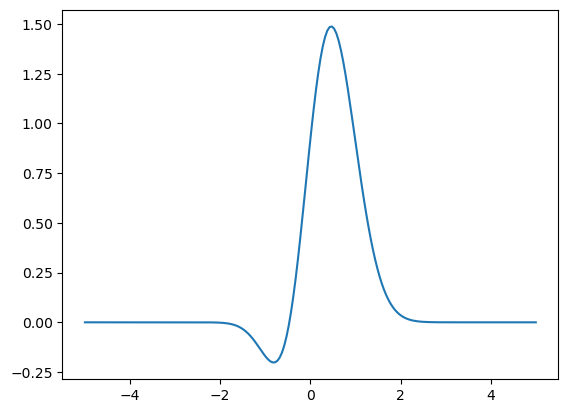

In [118]:
plt.plot(x,generate_initial_u(x))
plt.show()

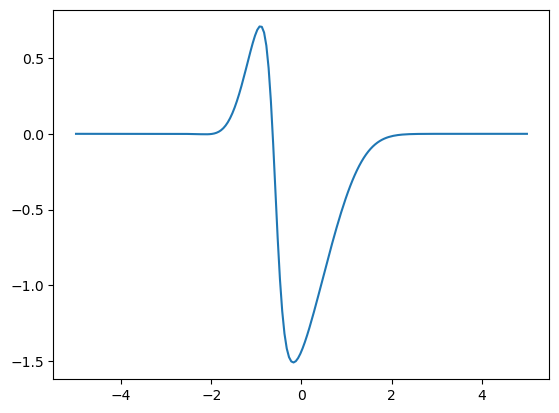

In [121]:
plt.plot(x,Y_bar[19])
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
L = 10.0  # Length of the domain
T = 2.0   # Total time
nx = 100   # Number of spatial grid points
nt = 500   # Number of time steps
nu = 0.01  # Kinematic viscosity
dx = L / (nx - 1)  # Spatial step size
dt = T / nt  # Time step size

# Function to initialize u(x, 0) as a Gaussian, now centered around 0
def initial_condition(x):
    return np.exp(-0.5 * (x)**2)

# Discretized Burgers equation solver using Lax-Friedrichs method with viscosity
def lax_friedrichs_with_viscosity(u, dx, dt, nu):
    # Create a copy of u to store the updated values
    u_new = np.copy(u)
    # Loop over the interior points and apply the Lax-Friedrichs scheme with viscosity
    for i in range(1, len(u) - 1):
        # Convective term (advection)
        convective_term = (u[i + 1] - u[i - 1]) / (2 * dx)
        # Diffusive term (viscosity)
        diffusive_term = (u[i + 1] - 2 * u[i] + u[i - 1]) / (dx**2)
        # Lax-Friedrichs update with viscosity
        u_new[i] = 0.5 * (u[i + 1] + u[i - 1]) - (dt / (2 * dx)) * u[i] * convective_term + nu * dt * diffusive_term
    # Apply periodic boundary conditions for symmetric domain
    u_new[0] = u_new[-2]
    u_new[-1] = u_new[1]
    return u_new

# Initialize the spatial grid and initial condition
x = np.linspace(-L/2, L/2, nx)  # Update the spatial grid to be symmetric about 0
u = initial_condition(x)

Y_bar=[]
for i in range(nt):
    u_new = lax_friedrichs_with_viscosity(u, dx, dt, nu)
    Y_bar.append(u_new)
    u = u_new
Y_bar=np.array(Y_bar)
print(Y_bar.shape)



(500, 100)


In [ ]:
# Set up the figure and axis for plotting
fig, ax = plt.subplots()
line, = ax.plot(x, u, label="Burgers equation solution")
ax.set_ylim(-0.5, 1.5)
ax.set_xlim(-L/2, L/2)
ax.set_title("Burgers Equation Evolution")
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")

# Animation update function
def update(frame):
    global u
    u = lax_friedrichs_with_viscosity(u, dx, dt, nu)
    line.set_ydata(u)  # Update the plot with the new u values
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=nt, blit=True, interval=50)

plt.show()